# **Predict Breast Cancer**

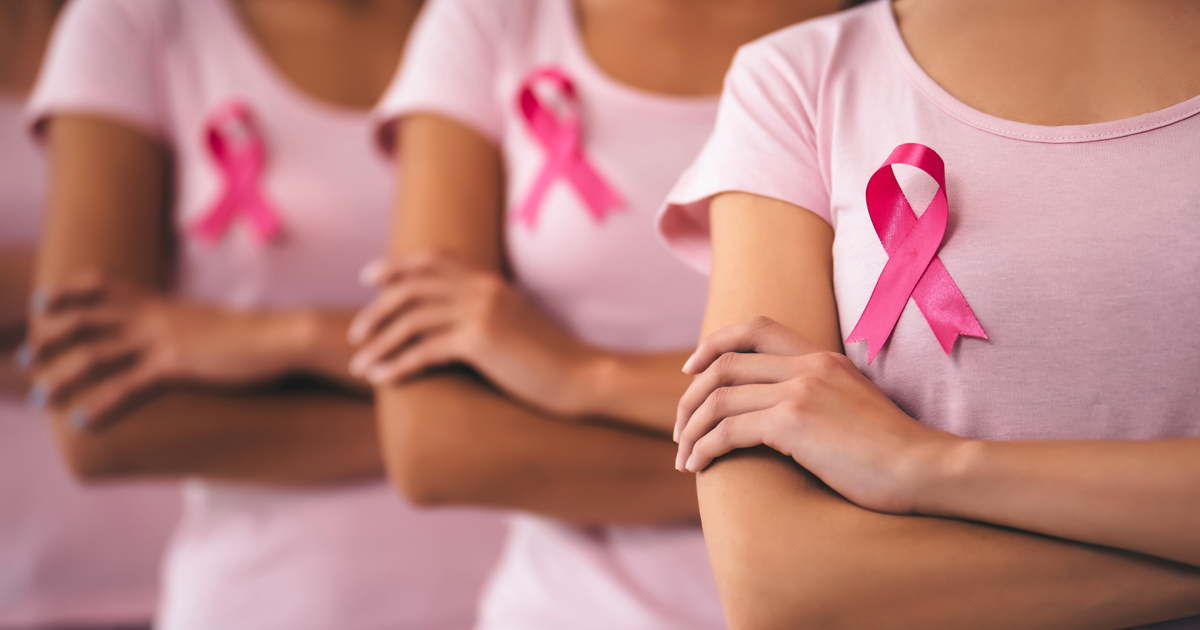

The most frequent malignancy among women worldwide is breast cancer. In 2015 alone, it afflicted nearly 2.1 million people and accounted for 25% of all cancer cases. When breast cells start to proliferate out of control, it begins. Typically, these cells develop into lumps in the breast region or tumors that can be seen on an X-ray.

How to distinguish benign from malignant (cancerous) tumors is the main obstacle to its identification (non cancerous). Using machine learning with Logestic Regression and Decision Tree  and the Breast Cancer Wisconsin (Diagnostic) Dataset, i to finish the analysis of identifying these tumors.

## **Import liberaries**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.decomposition import PCA


# **Load Dataset**

As we see here i upload the dataset and as we see the patient's ID , Diagnosis Malognant(M) and Benign (B),cancer idicatores and Null values  

In [ ]:
df=pd.read_csv('/content/33.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **1-Data Collection**

1.1- Split the data into independent (x) for the data after 'diagnosis' and dependet y for the 'diagnosis'.
 use them in arrays because of the parameters of this model 

In [ ]:
X=df.iloc[:,2:31].values 
y=df.iloc[:,1].values

1.2-split the dataset into 75% training and 25% testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print('the df shape is' ,df.shape)
print('the x train shape is' ,X_train.shape)
print('the xtest shape is',X_test.shape)
print('the x test shape is' ,y_train.shape)
print('the y test shape is' ,y_test.shape)

the df shape is (569, 33)
the x train shape is (426, 29)
the xtest shape is (143, 29)
the x test shape is (426,)
the y test shape is (143,)


# **2-DATA EXPLORATION** 

2.1 count the rows and columns 

In [ ]:
df.shape

(569, 33)

2.2-count the number of empty values (NAN,NaN,na) in each column 

In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

2.3-drop the empty values of the column (axis=1) and store back the values to the orgiinal df 

In [ ]:

df=df.dropna(axis=1)

2.4-Get the new count 

In [ ]:
df.shape

(569, 32)

2.5-Get the number of Malognant(M) and Benign (B)

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

2.6-Visualize the count of diagnosis (M) Malignant and (B) Benign

<Axes: xlabel='diagnosis', ylabel='count'>

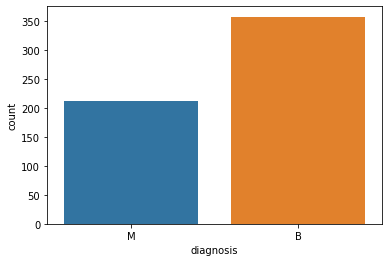

In [ ]:
sns.countplot(x='diagnosis', data=df)


2.7-check the data types to see which columns need to be encoded because ML models don't work with strings and shoukd be in int or float  

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

2.9-Get the coorelation 
to understand the data more and know what columns have positive and negative coorelation for example radius_mean has a positive coorelation to diagnosis (0.730029) and fractal_dimension_mean has negative coorelation to diagnosis(-0.012838)

In [ ]:
df.iloc[:,1:12].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


# **3-Data Pre-processing & Feature Engineering**

3.1- Encode categorical data values to use it in ML model and convert it to '0' and '1' so i use Label encoder because it's simple and easy to implement,can be useful when the categorical feature has an intrinsic order and It can save memory space and computation time. iloc[:,1] refers to column index number 1 'diagnosis' and ':' refers to all rows  .df.iloc[:,1] to stick the results back to the data frame 

In [ ]:
LabelEncoder_y=LabelEncoder()
df.iloc[:,1]=LabelEncoder_y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

3.2-To see the effect

In [ ]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


3.3-Data Normalization : rescales the data to a fixed range between 0 and 1 and apply them on training and testing data  

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

3.4- Dimension Reduction to reduce the number of the featues being used 

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


3.5-k-Fold cross validation to evaluate the performance of a machine learning model. 

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in kfold.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

# **4-Model Training**

# 4.1-Logesstic Regression 

I pick the logesstic regression to train the model grid search is a method for performing hyper-parameter optimisation, then fit the model and get 98.46% accuracy and best hyperparameter {'C': 100.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
parameters_grid = {
      'penalty': ['l1', 'l2'],
      'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000, 5000],
}

model_1 =GridSearchCV(LogisticRegression(),parameters_grid,scoring='accuracy',cv=5,n_jobs=-1,)

model_1.fit(X_train, y_train)

print('the accuracy of the best LR = {:.2f}'.format(model_1.best_score_*100))
print('the best found hyperparameters of LR = {}'.format(model_1.best_params_))

the accuracy of the best LR = 97.37
the best found hyperparameters of LR = {'C': 100.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# 4.2-SVC

I pick the logesstic regression to train the model grid search is a method for performing hyper-parameter optimisation, then fit the model and get 98.24% accuracy and best hyperparameter{'C': 0.1, 'degree': 4, 'kernel': 'poly'} 

In [ ]:
parameters_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
}

model_2 = GridSearchCV(SVC(), parameters_grid, scoring='accuracy', cv=5, n_jobs=-1)
model_2.fit(X_train, y_train)

print('the accuracy of the best SVM = {:.2f}'.format(model_2.best_score_*100))
print('the best found hyperparameters of SVM = {}'.format(model_2.best_params_))


the accuracy of the best SVM = 96.06
the best found hyperparameters of SVM = {'C': 10.0, 'degree': 2, 'kernel': 'linear'}


# **5-Model Assessment** 

We take the best model (Logesstic Regression) then calculate some metrices like accuracy of model ,confusion matrix iss technique for summarizing the performance of a algorithm. ,precision is ratio of correctly classified positive samples (True Positive) to a total number of classified positive samples (either correctly or incorrectly).,recall measures the model's ability to detect positive samples and f1-score measures a model’s accuracy. It combines the precision and recall scores of a model. 

In [ ]:
y_predicted = model_1.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
cm = confusion_matrix(y_test, y_predicted)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_predicted)
print ('accuracy',accuracy*100)
print('precision',precision*100)
print('recall',recall*100)
print('f1-score',f1*100)
print('confusion matrix',cm)

accuracy 40.55944055944056
precision [77.77777778 38.05970149]
recall [ 7.77777778 96.22641509]
f1-score [14.14141414 54.54545455]
confusion matrix [[ 7 83]
 [ 2 51]]


#**6-Final Discussion**

After many tries i figured out that the best 2 models are Logistic Regression and SVC and gave me the best accuracy. i used the kfold cross validation to a resampling procedure used to evaluate machine learning models on a limited data sample and MinMaxScaler scales the minimum and maximum values to be 0 and 1 respectively.I added PCA (Principal component analysis) to dimension reduction  i did all of these steps to get the best accuracy. the downside of my pipline is the time ,The 2 models take time to itterate but it gives me the accuracy that i need. the dataset can be small but it gave me all i need to apply all of the topics that i have learned in this module 

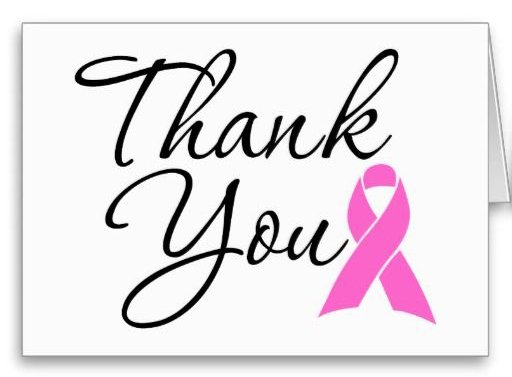